In [81]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

In [82]:
df = pd.read_csv("NFLX.csv")

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score

In [84]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [85]:
viz = df.copy()

In [86]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [87]:
df.shape

(1009, 7)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [89]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1009.0,4.190597e+02,1.085375e+02,2.339200e+02,3.314900e+02,3.777700e+02,5.091300e+02,6.923500e+02
High,1009.0,4.253207e+02,1.092630e+02,2.506500e+02,3.363000e+02,3.830100e+02,5.156300e+02,7.009900e+02
Low,1009.0,4.123740e+02,1.075559e+02,2.312300e+02,3.260000e+02,3.708800e+02,5.025300e+02,6.860900e+02
Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Adj Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Volume,1009.0,7.570685e+06,5.465535e+06,1.144000e+06,4.091900e+06,5.934500e+06,9.322400e+06,5.890430e+07


In [90]:
train, test = train_test_split(df, test_size = 0.2)

In [91]:
test_pred = test.copy()

In [92]:
train.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
185,2018-10-29,305.260010,307.890015,275.399994,284.839996,284.839996,21698800
178,2018-10-18,360.670013,362.200012,346.049988,346.709991,346.709991,18461000
464,2019-12-09,307.350006,311.489990,302.440002,302.500000,302.500000,5748400
744,2021-01-20,565.419983,593.289978,556.859985,586.340027,586.340027,32637500
301,2019-04-17,365.049988,368.760010,350.600006,354.739990,354.739990,18054100
397,2019-09-04,291.250000,292.380005,286.510010,291.519989,291.519989,4652500
572,2020-05-14,444.899994,452.380005,432.820007,441.950012,441.950012,9007500
45,2018-04-11,302.880005,311.640015,301.820007,303.670013,303.670013,14877400
653,2020-09-09,519.210022,520.000000,492.570007,500.190002,500.190002,6848100
645,2020-08-27,537.780029,541.000000,521.250000,526.270020,526.270020,9062900


In [93]:
test.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
105,2018-07-06,397.450012,408.649994,395.519989,408.250000,408.250000,8629600
425,2019-10-14,283.929993,286.929993,282.000000,285.529999,285.529999,5513200
787,2021-03-23,529.869995,543.119995,529.400024,535.090027,535.090027,5583500
24,2018-03-12,333.559998,333.980011,318.600006,321.299988,321.299988,20369200
709,2020-11-27,486.579987,493.250000,481.850006,491.359985,491.359985,2805800
715,2020-12-07,500.010010,517.760010,497.769989,515.780029,515.780029,4289300
188,2018-11-01,304.589996,318.450012,296.670013,317.380005,317.380005,15121500
68,2018-05-14,327.250000,330.500000,327.040009,328.529999,328.529999,4089800
260,2019-02-19,355.799988,365.000000,355.320007,361.920013,361.920013,7396600
892,2021-08-20,545.090027,551.390015,539.099976,546.880005,546.880005,3774300


In [94]:
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

In [95]:
y_train = train['Close'].values
y_test = test['Close'].values

#Linear Regression

In [96]:
model_lnr = LinearRegression()
model_lnr.fit(x_train, y_train)

LinearRegression()

In [97]:
LinearRegression()

LinearRegression()

In [98]:
y_pred = model_lnr.predict(x_test)

In [99]:
result = model_lnr.predict([[262.000000, 267.899994, 250.029999, 11896100]])
print(result)

[257.67411566]


#Model Evaluation

In [100]:
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

MSE 17.703
RMSE 4.208
MAE 3.141
MAPE 0.007
R2 Score :  0.998


#Model Visualization

In [101]:
def style():
    plt.figure(facecolor='black', figsize=(15,10))
    ax = plt.axes()

    ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to white
    ax.tick_params(axis='y', colors='white')    #setting up Y-axis tick color to white

    ax.spines['left'].set_color('white')        #setting up Y-axis spine color to white
    #ax.spines['right'].set_color('white')
    #ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')      #setting up X-axis spine color to white

    ax.set_facecolor("black")                   # Setting the background color of the plot using set_facecolor() method

In [102]:
viz['Date']=pd.to_datetime(viz['Date'],format='%Y-%m-%d')

In [103]:
data = pd.DataFrame(viz[['Date','Close']])
data=data.reset_index()
data=data.drop('index',axis=1)
data.set_index('Date', inplace=True)
data = data.asfreq('D')
data

,Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


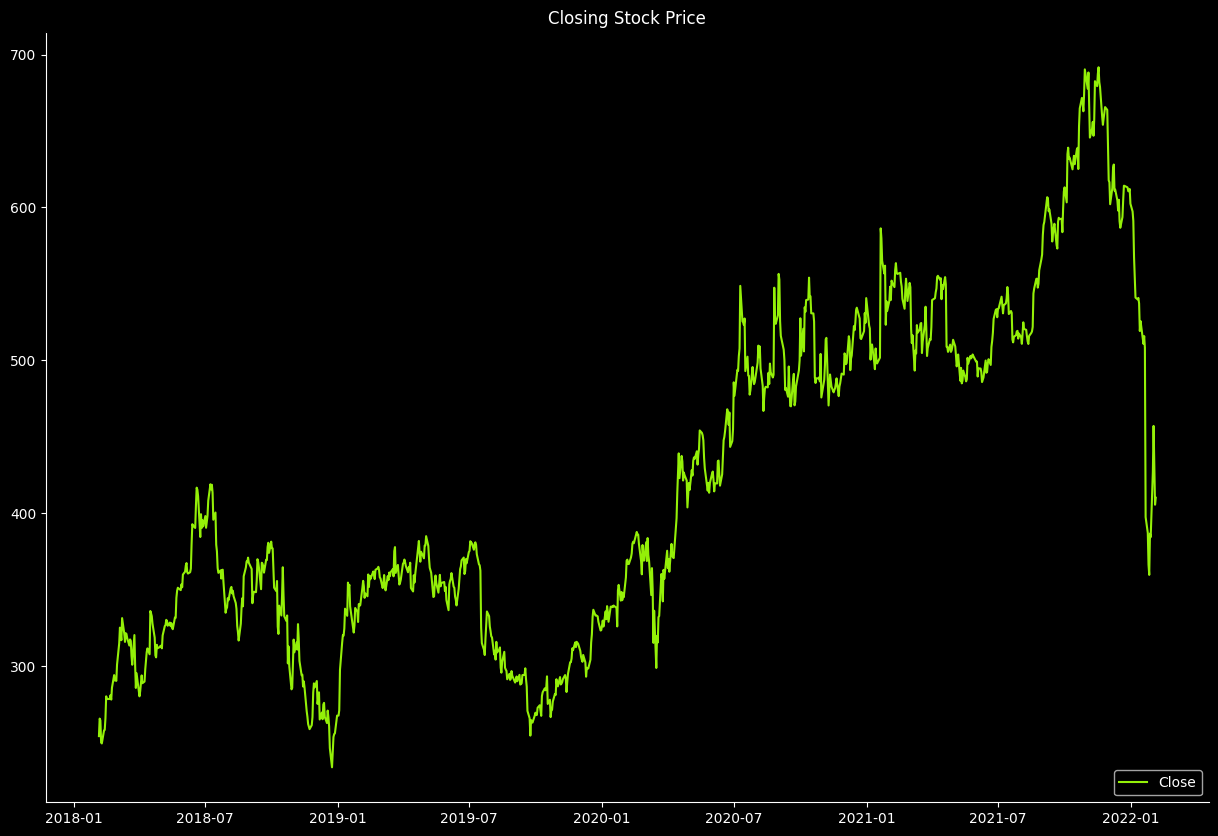

In [104]:
style()

plt.title('Closing Stock Price', color="white")
plt.plot(viz.Date, viz.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

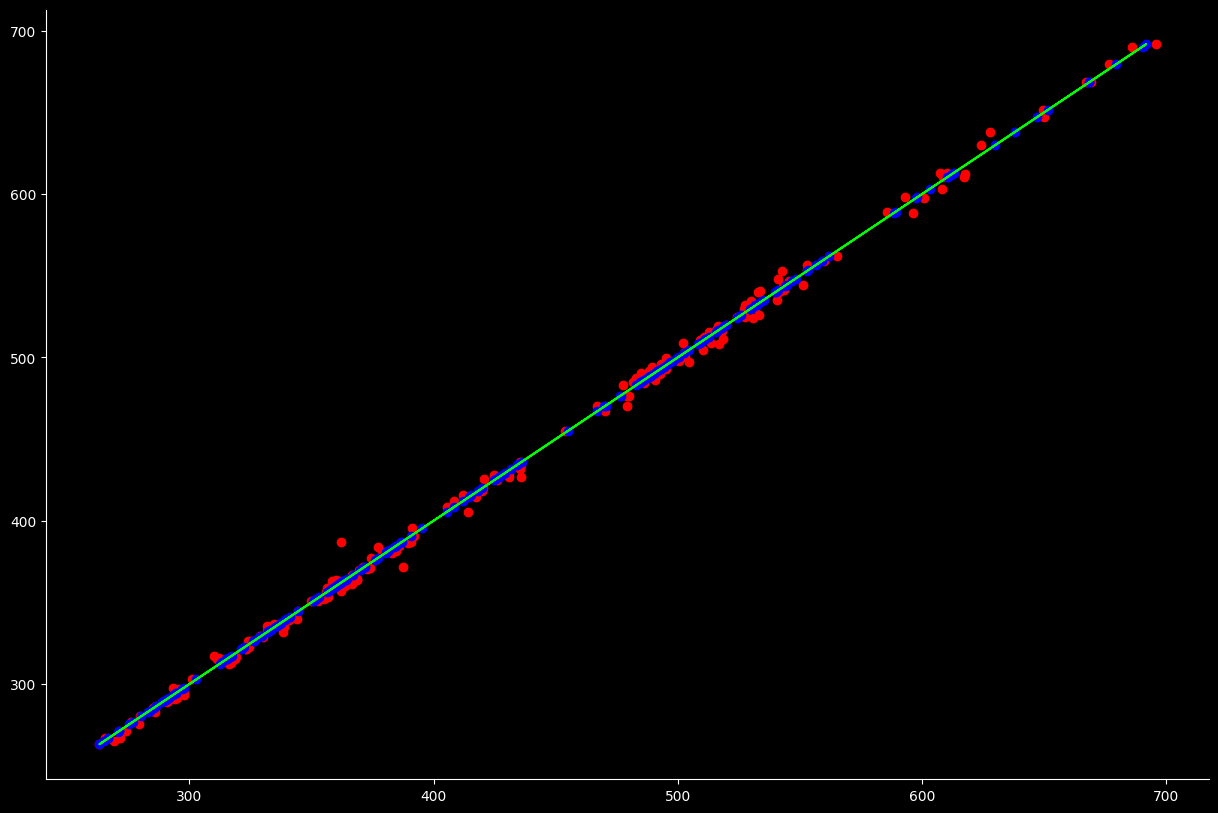

In [105]:
style()

plt.scatter(y_pred, y_test, color='red', marker='o')
plt.scatter(y_test, y_test, color='blue')
plt.plot(y_test, y_test, color='lime')

In [106]:
test_pred['Close_Prediction'] = y_pred
test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
105,2018-07-06,397.450012,408.649994,395.519989,408.250000,408.250000,8629600,405.439239
425,2019-10-14,283.929993,286.929993,282.000000,285.529999,285.529999,5513200,285.123280
787,2021-03-23,529.869995,543.119995,529.400024,535.090027,535.090027,5583500,540.461708
24,2018-03-12,333.559998,333.980011,318.600006,321.299988,321.299988,20369200,323.121615
709,2020-11-27,486.579987,493.250000,481.850006,491.359985,491.359985,2805800,488.151454
...,...,...,...,...,...,...,...,...
510,2020-02-14,381.470001,385.149994,379.429993,380.399994,380.399994,3736300,382.972885
132,2018-08-14,342.089996,342.410004,336.250000,337.489990,337.489990,5805200,337.928623
564,2020-05-04,417.779999,428.540009,414.869995,428.149994,428.149994,7799100,424.534867
429,2019-10-18,289.359985,290.899994,273.359985,275.299988,275.299988,23429900,279.200495


In [107]:
test_pred[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,202.0,428.685446,108.143408,263.079987,337.460007,410.070007,512.317482,691.690002
Close_Prediction,202.0,429.055266,107.659757,262.927306,338.505316,410.108030,514.954887,695.707301


#Saving the Data as CSV

In [108]:
test_pred['Date'] = pd.to_datetime(test_pred['Date'],format='%Y-%m-%d')

In [109]:
output = pd.DataFrame(test_pred[['Date', 'Close', 'Close_Prediction']])
output = output.reset_index()
output = output.drop('index',axis=1)
output.set_index('Date', inplace=True)
output =  output.asfreq('D')
output

,Close,Close_Prediction
Date,,
2018-02-27,290.609985,294.097482
2018-02-28,NaN,NaN
2018-03-01,NaN,NaN
2018-03-02,NaN,NaN
2018-03-03,NaN,NaN
...,...,...
2022-01-30,NaN,NaN
2022-01-31,NaN,NaN
2022-02-01,NaN,NaN


In [110]:
output.to_csv('Close_Prediction.csv', index=True)
print("CSV successfully saved!")

CSV successfully saved!


In [111]:
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100
print("Model Accuracy (R2 Score): {:.2f}%".format(accuracy))


Model Accuracy (R2 Score): 99.85%


In [112]:
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

with open('stock_price_prediction.pkl', 'wb') as file:
    pickle.dump(model_lnr, file)